# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

# Introducción  

La **diabetes mellitus tipo II** es una de las enfermedades crónicas más prevalentes a nivel mundial y representa un grave problema de salud pública. Según la **Organización Mundial de la Salud (OMS)**, en 2021 se estimaron más de *460 millones* de personas viviendo con diabetes, y se proyecta que esta cifra aumente de manera considerable en las próximas décadas [1]. En **América Latina** y particularmente en **México**, la diabetes se ha consolidado como una de las principales causas de mortalidad y discapacidad, con un fuerte impacto tanto en la calidad de vida de los pacientes como en los sistemas de salud [2].  

Uno de los mecanismos terapéuticos más prometedores para el control glucémico es la activación de la hormona **GLP-1 (*Glucagon-like peptide-1*)**, la cual regula de forma clave la secreción de insulina y el metabolismo de la glucosa. Fármacos exitosos como la **semaglutida (Ozempic)** y la **dulaglutida (Trulicity)** se basan en agonistas de GLP-1, logrando resultados altamente eficaces en el tratamiento de la diabetes tipo II y la obesidad. Sin embargo, el diseño y optimización de estos compuestos ha requerido procesos experimentales de laboratorio extensos, prolongados y costosos, que suelen superar los *15 años* de investigación y desarrollo [3].  

El objetivo de este proyecto es **desarrollar un modelo de inteligencia artificial** capaz de identificar y generar compuestos moleculares con alta eficiencia agonista de la hormona GLP-1, lo que podría acelerar el descubrimiento de nuevos fármacos para el tratamiento de la diabetes tipo II y la obesidad. Este Jupyter Notebook se centra en la fase inicial del proyecto: **Análisis Exploratorio de Datos (EDA)**.  

En esta etapa, se analizarán datos obtenidos de bases de datos especializadas como **DrugBank** y **Protein Data Bank (PDB)** [4,5], que contienen información sobre agonistas de GLP-1 y secuencias de proteínas en formato **FASTA**. 


In [1]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librería para SVM
from sklearn.svm import SVC
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt
# Para la creación de gráficos estadísticos
import seaborn as sns

## 1 Exploración del conjunto de datos

Se carga el conjunto de datos desde 125_EC50.csv al DataFrame data_df. Un análisis inicial confirma que el dataset contiene 125 registros de péptidos y 9 columnas. Las columnas incluyen identificadores, secuencias, longitud y los valores de actividad biológica (EC50), que serán el objetivo del análisis. Es importante destacar que el conjunto de datos está completo y no presenta valores nulos.

In [ ]:
# Leemos el set de datos y lo cargamos en la variable df, que es un DataFrame de pandas
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data set proyecto integrador/125_EC50.csv')
# Mostrar información sobre el set de datos
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   125 non-null    int64  
 1   pep_ID       125 non-null    object 
 2   alias        125 non-null    object 
 3   sequence     125 non-null    object 
 4   length       125 non-null    int64  
 5   EC50_T1      125 non-null    float64
 6   EC50_LOG_T1  125 non-null    float64
 7   EC50_T2      125 non-null    float64
 8   EC50_LOG_T2  125 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 8.9+ KB


In [ ]:
# Mostrar primeros registros del set de datos
data_df.head()

,Unnamed: 0,pep_ID,alias,sequence,length,EC50_T1,EC50_LOG_T1,EC50_T2,EC50_LOG_T2
0,1,seq_pep1,training_data,HSQGTFTSDYSKYLDSRRAQDFVQWLEEGE,30,3.75,-11.43,563.00,-9.25
1,2,seq_pep2,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLENGE,30,18.50,-10.73,552.00,-9.26
2,3,seq_pep3,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLENT,29,3.51,-11.45,252.00,-9.60
3,4,seq_pep4,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLVAGGSGSGSG,36,50.50,-10.30,6.03,-11.22
4,5,seq_pep5,training_data,HSQGTFTSDYSKYLDSRRAQDFVQWLEAEG,30,2.87,-11.54,238.00,-9.62


### Descripción de las columnas

* EC50 (Effective Concentration 50%) es la concentración necesaria de un péptido para generar el 50% de la respuesta máxima en un sistema biológico

* EC50_T1 se refiere a la concentracion efectiva para el receptor GCGR y
* EC50_T2 se refiere a la concentracion efectiva para el receptor GLP-1,
* Columnas EC50_Log_T1 y EC50_Log_T2, que son los valores en escala log10 de
* Las columnas EC50_T1 y EC50_T2 respectivamente.

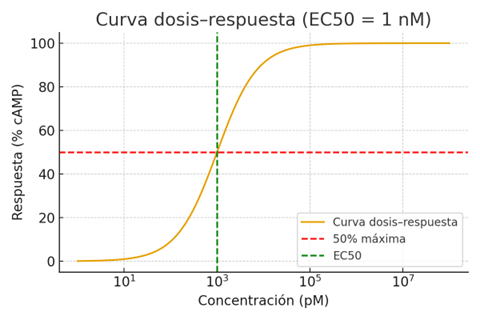

curva dosis–respuesta para un péptido con EC50 = 1 nM.

## 2. Análisis de Longitud de Secuencias

Se realiza el análisis para determinar la variablilidad de la longitud de las secuencias ¿Son todos de un tamaño similar o hay una gran variabilidad?

--- 1. Análisis de Longitud de Secuencias ---


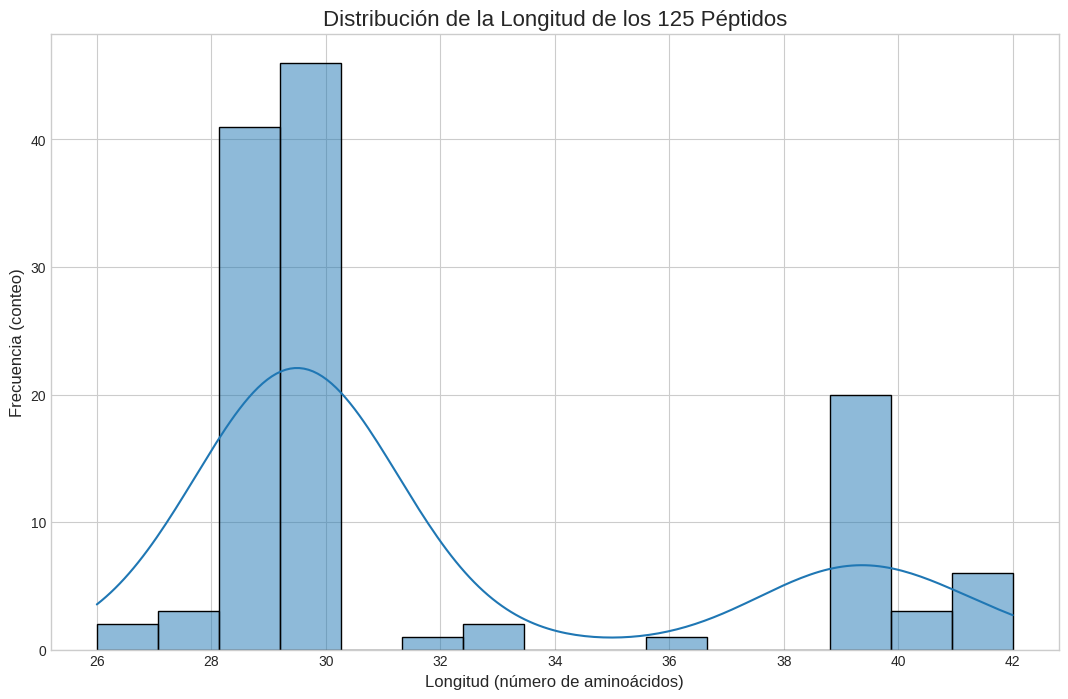

In [ ]:
print("--- 1. Análisis de Longitud de Secuencias ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(13, 8))
sns.histplot(data_df['length'], kde=True, bins=15)
plt.title('Distribución de la Longitud de los 125 Péptidos', fontsize=16)
plt.xlabel('Longitud (número de aminoácidos)', fontsize=12)
plt.ylabel('Frecuencia (conteo)', fontsize=12)
plt.show()

Análisis de la Distribución de Longitud

El histograma de la longitud de los 125 péptidos revela una naturaleza bimodal indicando la presencia de dos grupos principales claramente diferenciados por su tamaño:

Un grupo dominante y más numeroso, cuya longitud se concentra principalmente entre 29 y 30 aminoácidos.

Un segundo grupo notable, aunque más pequeño, con péptidos de aproximadamente 40 aminoácidos de longitud.

Esta característica sugiere que el conjunto de datos es heterogéneo y está compuesto por al menos dos subpoblaciones de péptidos distintas, lo cual podría ser un factor importante a considerar en análisis posteriores de su actividad biológica.

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.3 MB/s eta 0:00:00


## 3 Cálculo de propiedades físico-químicas

El análisis de las propiedades físico-químicas revela características importantes del conjunto de datos. Tanto el Peso Molecular como el Punto Isoeléctrico (pI) presentan una distribución bimodal, confirmando la existencia de al menos dos subpoblaciones de péptidos distintas en tamaño y carga. El grupo mayoritario está compuesto por péptidos más pequeños (≈3400 Da) y de carácter ácido (pI ≈ 5.0). Por otro lado, el análisis de Hidrofobicidad (GRAVY) muestra que la gran mayoría de los péptidos son hidrofílicos (valores negativos), una propiedad clave para su solubilidad y potencial farmacéutico.

Propiedades calculadas y añadidas al DataFrame.


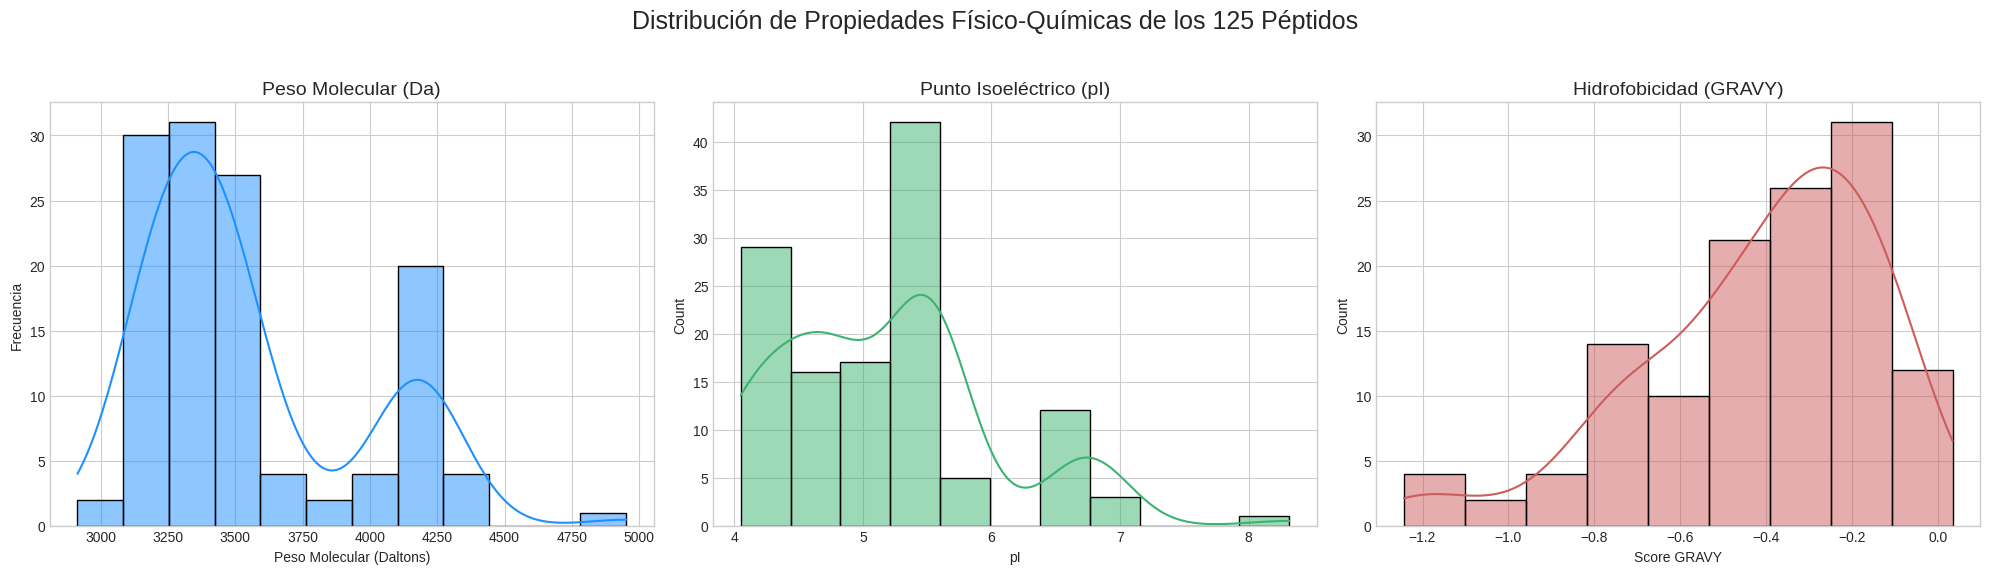

In [ ]:
# --- 3. Cálculo y Análisis de Propiedades Físico-Químicas ---
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Función para calcular las propiedades
def property_calculation(sequence: str) -> dict:
    try:
        analisis = ProteinAnalysis(sequence)
        return {
            'peso_molecular': analisis.molecular_weight(),
            'punto_isoelectrico': analisis.isoelectric_point(),
            'hidrofobicidad_gravy': analisis.gravy()
        }
    except Exception as e:
        # Retorna Nulos si hay algún error (ej. caracteres no estándar)
        return {'peso_molecular': None, 'punto_isoelectrico': None, 'hidrofobicidad_gravy': None}

# Aplicamos la función a la columna de secuencias del DataFrame
propiedades_df = data_df['sequence'].apply(lambda seq: pd.Series(property_calculation(seq)))

# Se unen las nuevas propiedades a tu DataFrame original para el análisis
df_analisis_propiedades = pd.concat([data_df, propiedades_df], axis=1)

print("Propiedades calculadas y añadidas al DataFrame.")

# --- Visualización de la distribución de estas nuevas propiedades ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribución de Propiedades Físico-Químicas de los 125 Péptidos', fontsize=18)

# Histograma del Peso Molecular
sns.histplot(df_analisis_propiedades['peso_molecular'].dropna(), kde=True, ax=axes[0], color='dodgerblue')
axes[0].set_title('Peso Molecular (Da)', fontsize=14)
axes[0].set_xlabel('Peso Molecular (Daltons)')
axes[0].set_ylabel('Frecuencia')

# Histograma del Punto Isoeléctrico (pI)
sns.histplot(df_analisis_propiedades['punto_isoelectrico'].dropna(), kde=True, ax=axes[1], color='mediumseagreen')
axes[1].set_title('Punto Isoeléctrico (pI)', fontsize=14)
axes[1].set_xlabel('pI')

# Histograma del Score GRAVY (Hidrofobicidad)
sns.histplot(df_analisis_propiedades['hidrofobicidad_gravy'].dropna(), kde=True, ax=axes[2], color='indianred')
axes[2].set_title('Hidrofobicidad (GRAVY)', fontsize=14)
axes[2].set_xlabel('Score GRAVY')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste para el título principal
plt.show()

## 4 Relación entre Propiedades y Actividad Biológica

Para este proyecto usaremos la columna EC50_LOG_T2 que corresponde al GLP-1

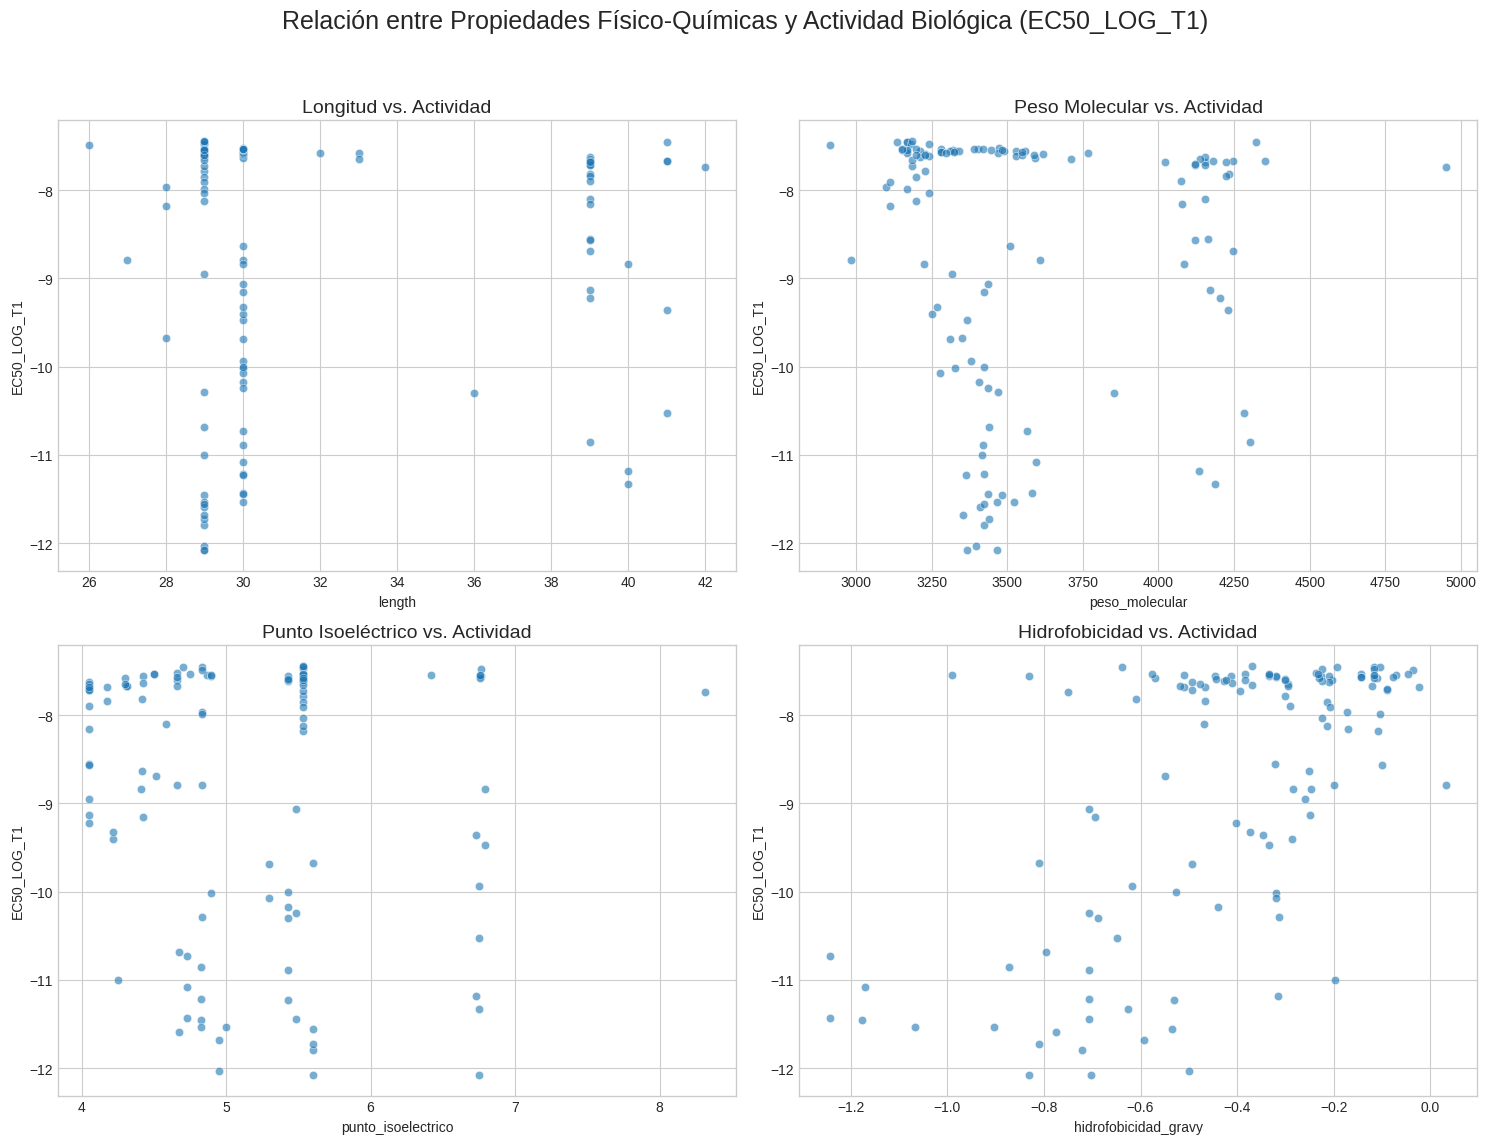

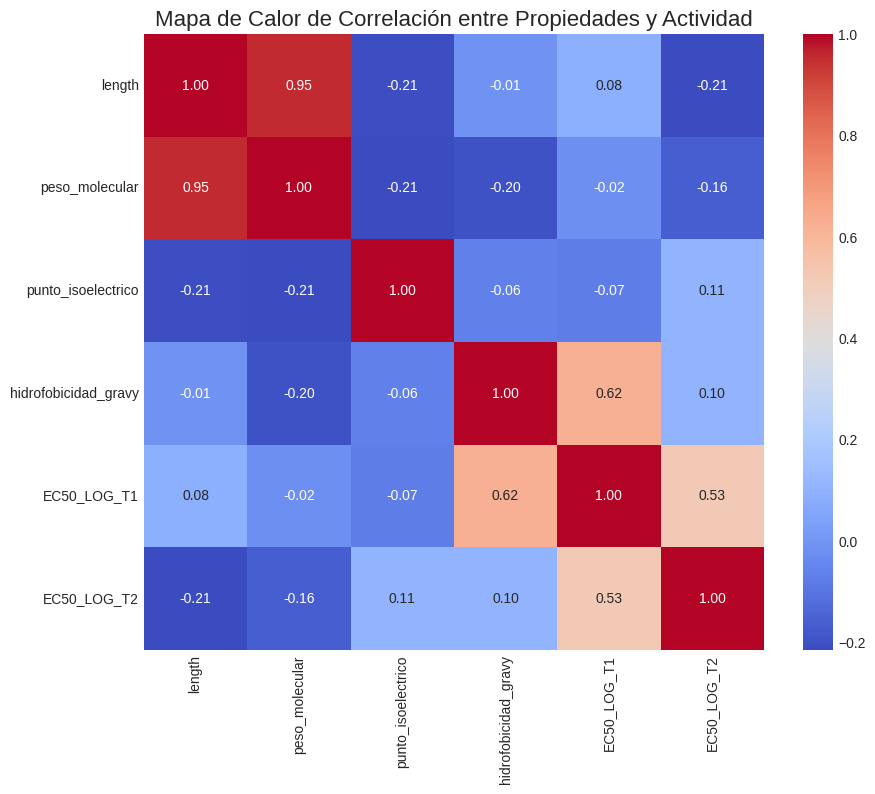

In [ ]:
# --- Relación entre Propiedades y Actividad Biológica ---

# --- Gráficos de Dispersión (Scatter Plots) ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relación entre Propiedades Físico-Químicas y Actividad Biológica (EC50_LOG_T2)', fontsize=18)

# 1. Longitud vs. Actividad
sns.scatterplot(data=df_analisis_propiedades, x='length', y='EC50_LOG_T2', ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title('Longitud vs. Actividad', fontsize=14)

# 2. Peso Molecular vs. Actividad
sns.scatterplot(data=df_analisis_propiedades, x='peso_molecular', y='EC50_LOG_T2', ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Peso Molecular vs. Actividad', fontsize=14)

# 3. Punto Isoeléctrico vs. Actividad
sns.scatterplot(data=df_analisis_propiedades, x='punto_isoelectrico', y='EC50_LOG_T2', ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('Punto Isoeléctrico vs. Actividad', fontsize=14)

# 4. Hidrofobicidad vs. Actividad
sns.scatterplot(data=df_analisis_propiedades, x='hidrofobicidad_gravy', y='EC50_LOG_T2', ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title('Hidrofobicidad vs. Actividad', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Matriz de Correlación con Mapa de Calor ---
# Seleccionamos solo las columnas numéricas relevantes para el mapa de calor
columnas_numericas = ['length', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy', 'EC50_LOG_T2', 'EC50_LOG_T2']
correlation_matrix = df_analisis_propiedades[columnas_numericas].corr()

# Graficamos la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Propiedades y Actividad', fontsize=16)
plt.show()

El análisis de correlación revela que la hidrofobicidad (score GRAVY) es la propiedad físico-química con la relación más significativa con la actividad biológica, presentando una correlación positiva moderada de 0.62 con el EC50_LOG_T1. Como se observa en el gráfico de dispersión, esto indica que los péptidos más hidrofílicos (score GRAVY más bajo) tienden a ser más potentes (valor EC50_LOG_T1 más bajo).

Por otro lado, la longitud, el peso molecular y el punto isoeléctrico no muestran una correlación lineal fuerte con la actividad, sugiriendo que son predictores menos directos de la potencia del péptido.

Conclusión Clave: La hidrofobicidad parece ser un factor determinante en la efectividad de estos péptidos. Esta es exactamente la clase de relación que un modelo de aprendizaje automático puede aprender a utilizar para hacer predicciones.

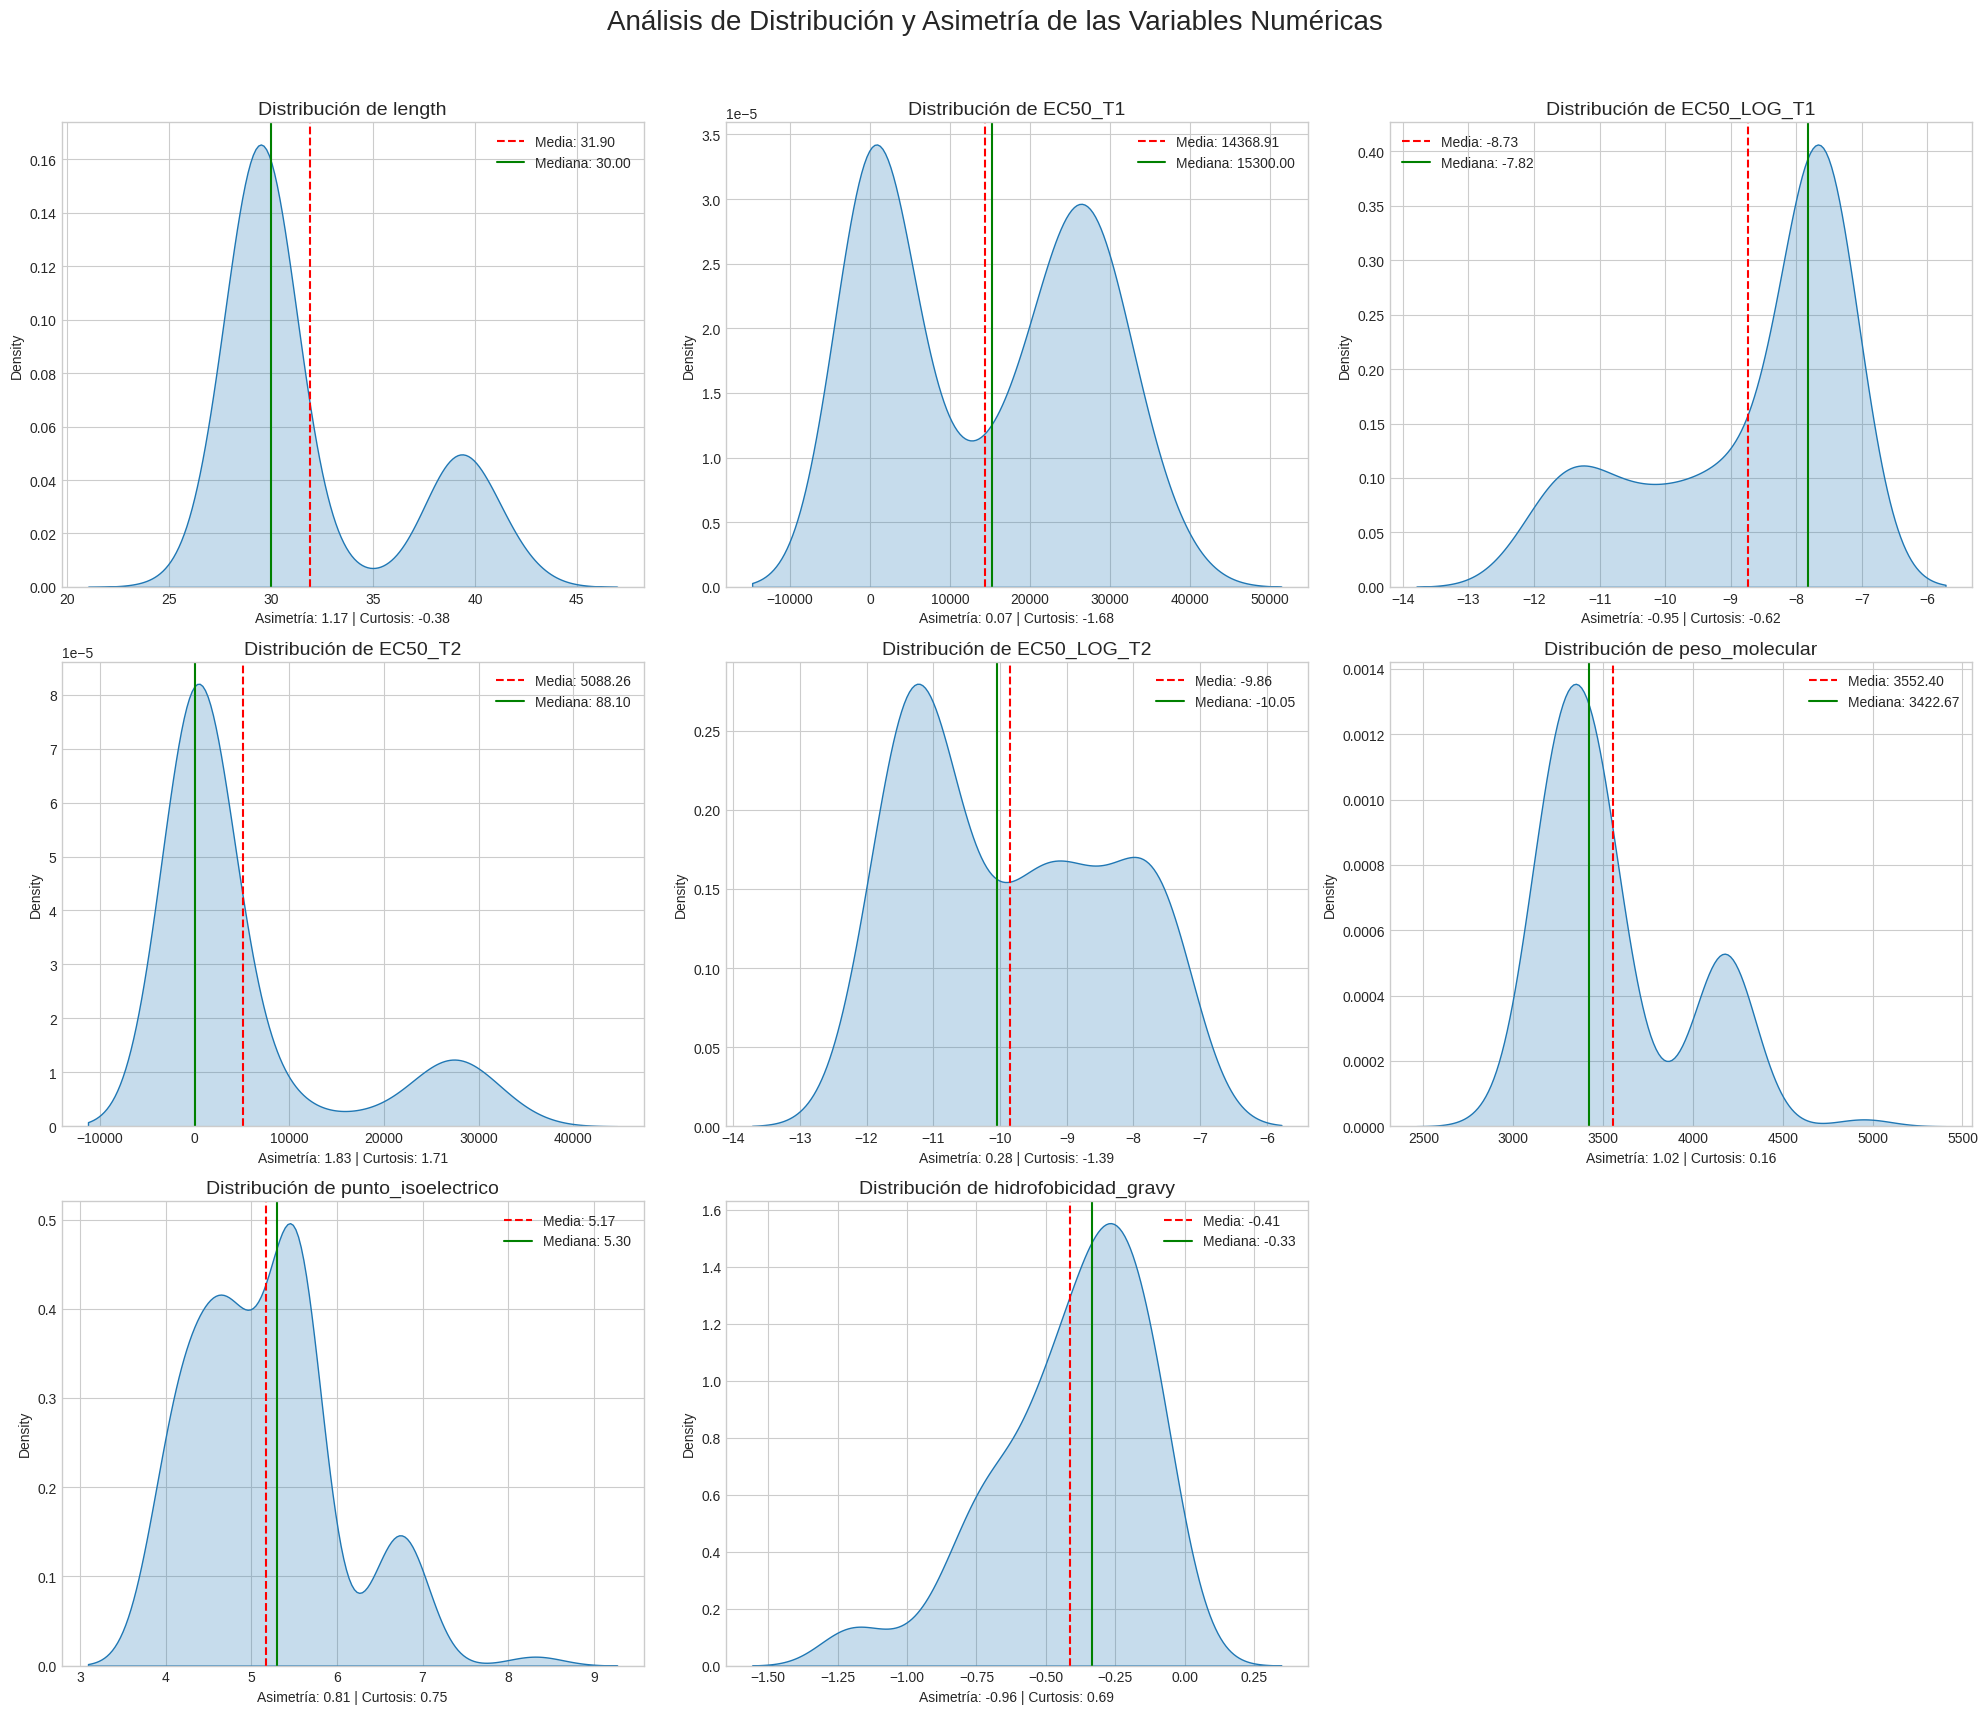

In [ ]:
# --- Análisis Detallado de la Distribución de Variables Numéricas ---

# Lista de columnas numéricas que queremos analizar de nuestro DataFrame con propiedades
columnas_numericas_completas = [
    'length', 'EC50_T1', 'EC50_LOG_T1', 'EC50_T2', 'EC50_LOG_T2',
    'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy'
]

# Crear una figura con subplots para los gráficos de densidad
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.ravel() # Aplanar el array de ejes para iterar fácilmente

fig.suptitle('Análisis de Distribución y Asimetría de las Variables Numéricas', fontsize=20)

for i, col in enumerate(columnas_numericas_completas):
    # Graficar la densidad (KDE)
    sns.kdeplot(df_analisis_propiedades[col], ax=axes[i], fill=True)

    # Añadir líneas para la media y la mediana
    mean_val = df_analisis_propiedades[col].mean()
    median_val = df_analisis_propiedades[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')

    # Calcular y mostrar asimetría y curtosis
    skewness = df_analisis_propiedades[col].skew()
    kurtosis = df_analisis_propiedades[col].kurt()
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].legend()
    axes[i].set_xlabel(f'Asimetría: {skewness:.2f} | Curtosis: {kurtosis:.2f}')

# Ocultar ejes que no se usan si el número de variables es menor a 9
for i in range(len(columnas_numericas_completas), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

El análisis de las distribuciones de densidad confirma la naturaleza bimodal de las propiedades físicas como la longitud, el peso molecular y el punto isoeléctrico. Las variables de actividad biológica, EC50_T1 y EC50_T2, presentan una fuerte asimetría positiva, indicando la presencia de valores atípicos altos (péptidos poco potentes). Sin embargo, sus transformaciones logarítmicas (EC50_LOG) revelan una estructura subyacente bimodal y más simétrica, sugiriendo dos grupos distintos en cuanto a su efectividad. Finalmente, la hidrofobicidad muestra una asimetría negativa, destacando un subgrupo de péptidos con un carácter marcadamente hidrofílico.

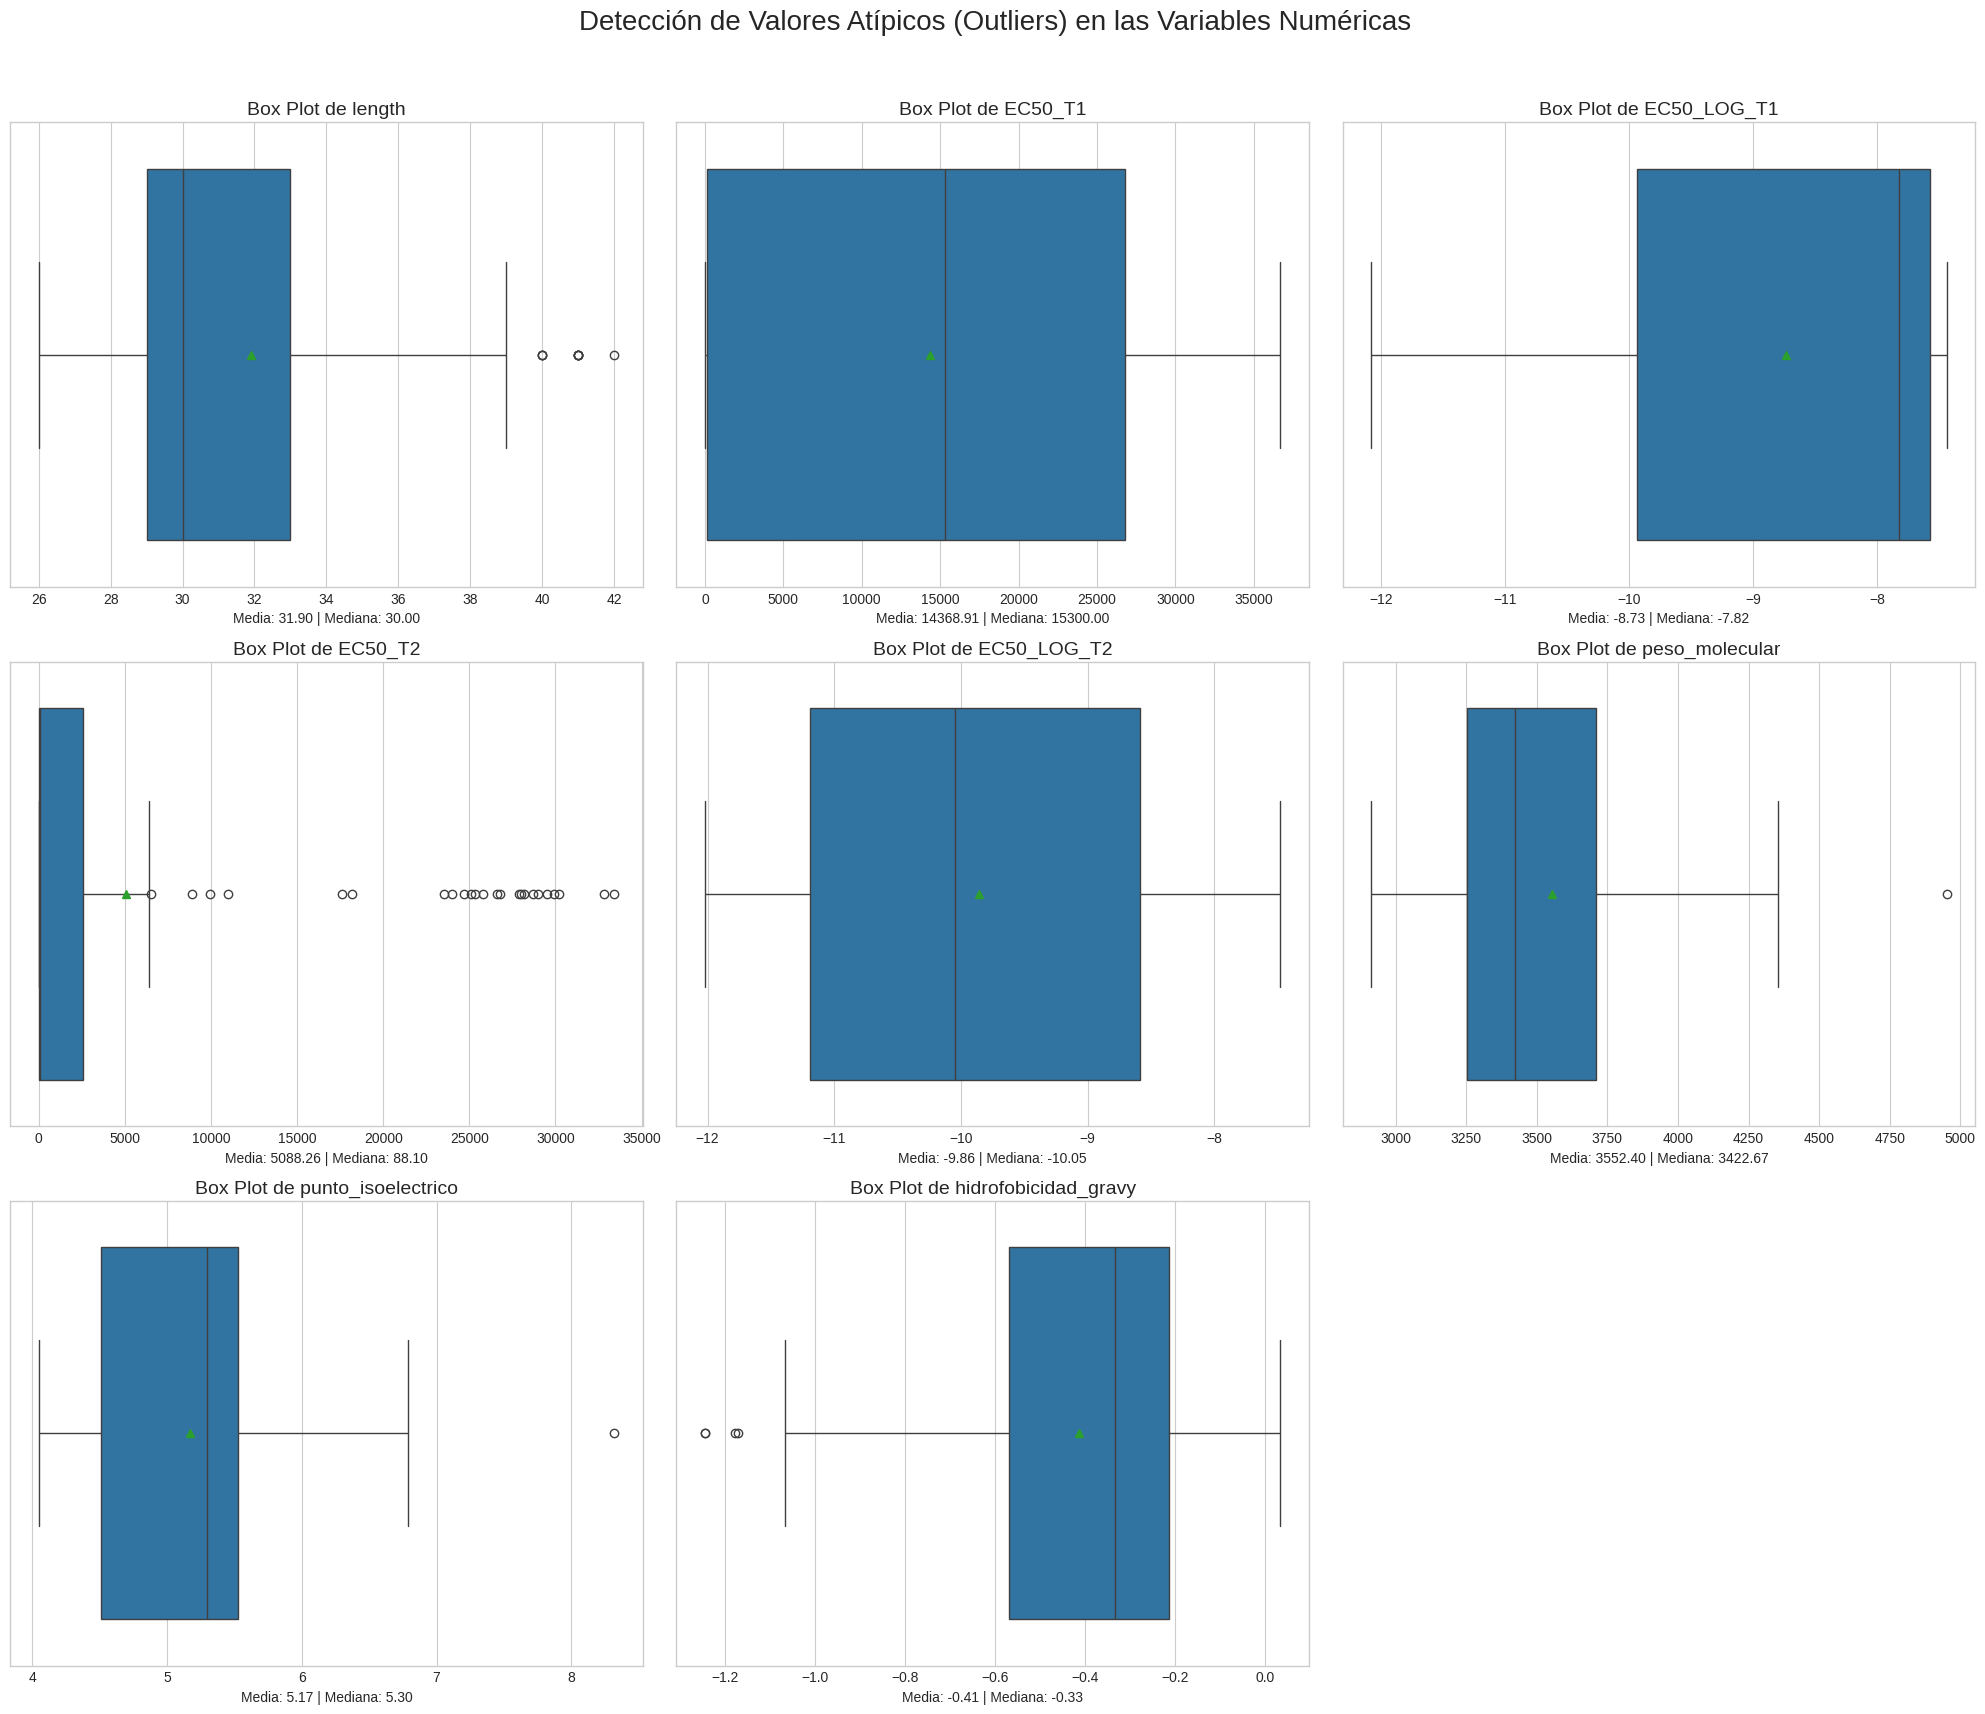

In [ ]:
# --- Detección de Valores Atípicos (Outliers) con Diagramas de Caja ---

# Crear una figura con subplots para los diagramas de caja
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.ravel()

fig.suptitle('Detección de Valores Atípicos (Outliers) en las Variables Numéricas', fontsize=20)

for i, col in enumerate(columnas_numericas_completas):
    # Graficar el diagrama de caja
    sns.boxplot(data=df_analisis_propiedades, x=col, ax=axes[i], showmeans=True)

    # Añadir título y etiquetas
    mean_val = df_analisis_propiedades[col].mean()
    median_val = df_analisis_propiedades[col].median()
    axes[i].set_title(f'Box Plot de {col}', fontsize=14)
    axes[i].set_xlabel(f'Media: {mean_val:.2f} | Mediana: {median_val:.2f}')

# Ocultar ejes que no se usan
for i in range(len(columnas_numericas_completas), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

Los diagramas de caja confirman las distribuciones observadas previamente y son especialmente útiles para la detección de valores atípicos (outliers). Las variables de actividad EC50 sin transformar muestran numerosos outliers en los valores altos, indicando péptidos con muy baja potencia. La transformación logarítmica (EC50_LOG) normaliza en gran medida esta distribución, aunque persisten algunos valores extremos. En cuanto a las propiedades físico-químicas, se identifican pocos outliers, destacando algunos péptidos excepcionalmente grandes (length, peso_molecular) y un pequeño grupo con una marcada hidrofilicidad (hidrofobicidad_gravy).

La identificación de estos outliers es un paso crucial, ya que estos valores extremos podrían influir de manera desproporcionada en el entrenamiento de un futuro modelo de aprendizaje automático.

**Conclusión del Análisis Exploratorio de Datos**

El análisis exploratorio del conjunto de datos de 125 péptidos ha revelado características estructurales y relaciones clave para entender su actividad biológica.

El estudio de las propiedades individuales demostró que el conjunto de datos es heterogéneo. Específicamente, la longitud, el peso molecular y el punto isoeléctrico presentan una distribución bimodal, sugiriendo la existencia de dos subpoblaciones distintas de péptidos en cuanto a su tamaño y carga. Por su parte, el análisis de hidrofobicidad (score GRAVY) indicó que la gran mayoría de los péptidos tienen un carácter marcadamente hidrofílico (afín al agua).

La investigación de correlaciones identificó a la hidrofobicidad como la propiedad con la relación más significativa con la potencia de los péptidos. Se encontró una correlación positiva moderada entre el score GRAVY y el valor EC50_LOG, lo que demuestra que los péptidos más hidrofílicos tienden a ser más potentes. Otras características como la longitud o el pI no mostraron una correlación lineal directa con la actividad.

Finalmente, el Análisis de Componentes Principales (PCA) confirmó estos hallazgos de manera visual, mostrando un claro gradiente que separa los péptidos de alta y baja potencia en función de sus características combinadas. Esto demuestra que las propiedades del conjunto de datos contienen información estructurada y relevante para diferenciar la actividad biológica de las moléculas.